In [1]:
import os

import pandas as pd

def load_data(random_disturb: bool, N, dim, method):
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    MEAN = {}
    MU = [0.015, 0.1, 0.2, 0.3, 0.4, 0.5]
    
    for mu in MU:
        if random_disturb:
            folder_name = f"Stoch_{N}_{methods[method-1]}"
            file_name = f"Stoch_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"
        else:
            folder_name = f"Btwn_{N}_{methods[method-1]}"   
            file_name = f"Btwn_{N}_{mu}_{dim}dim_" + methods[method-1] + "_MEAN.csv"

        file_path = os.path.join(folder_name, file_name)
        
        MEAN[mu] = pd.read_csv(file_path, header=None, sep=' ')
        
    return MEAN

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Plot_NMI(random_disturb, N, method):
    
    MEAN16 = load_data(random_disturb=random_disturb, N=N, dim=16, method=3)
    MEAN32 = load_data(random_disturb=random_disturb, N=N, dim=32, method=3)

    MU = [0.015, 0.1, 0.2, 0.3, 0.4, 0.5]
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    labels = {0.015: 'μ=0.015', 0.1: 'μ=0.1', 0.2: 'μ=0.2', 0.3: 'μ=0.3', 0.4: 'μ=0.4', 0.5: 'μ=0.5'}
    colors = {0.015: 'red', 0.1: 'orange', 0.2: 'green', 0.3: 'blue', 0.4: 'indigo', 0.5: 'violet'}

    # Create x values
    x = np.arange(0, 0.86, 0.05)

    # Create a 2x2 grid of subplots with shared x and y axes
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))

    # Plot two curves in each subplot and set the color legend

    for mu in MU:
        axes[0, 0].plot(x, MEAN16[mu][0], label=labels[mu], color=colors[mu])
        axes[0, 1].plot(x, MEAN16[mu][1], label=labels[mu], color=colors[mu])
        axes[1, 0].plot(x, MEAN32[mu][0], label=labels[mu], color=colors[mu])
        axes[1, 1].plot(x, MEAN32[mu][1], label=labels[mu], color=colors[mu])
    for ax in axes.flat:
            ax.set_aspect('equal')
        
    fig.text(0.1, 0.58, '(a)', fontsize=12, weight='bold')
    fig.text(0.59, 0.58, '(b)', fontsize=12, weight='bold')
    fig.text(0.1, 0.18, '(c)', fontsize=12, weight='bold')
    fig.text(0.59, 0.18, '(d)', fontsize=12, weight='bold')
    axes[0, 0].set_title('16-dim, Euclidean')
    axes[0, 1].set_title('16-dim, Spherical')
    axes[1, 0].set_title('32-dim, Euclidean')
    axes[1, 1].set_title('32-dim, Spherical')


    # Add a common x-axis label and y-axis label
    fig.text(0.5, 0.09, 'Percentage of Nodes Removed', ha='center', fontsize=12)
    fig.text(0, 0.5, 'NMI', va='center', rotation='vertical', fontsize=12)

    # Collect legend handles and labels from one of the subplots
    handles, labels = axes[0, 0].get_legend_handles_labels()

    # Create a common legend outside the subplots at the bottom
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=6)

    # Adjust spacing between subplots and below the bottom legend
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])

    if random_disturb:
        file_name = f"Stoch_{N}_{methods[method-1]}.png"
    else:
        file_name = f"Btwn_{N}_{methods[method-1]}.png"   
    plt.savefig(file_name)    
    
# Show the plot
plt.show()

In [3]:
random_disturb = True
N = 1000
method = 3

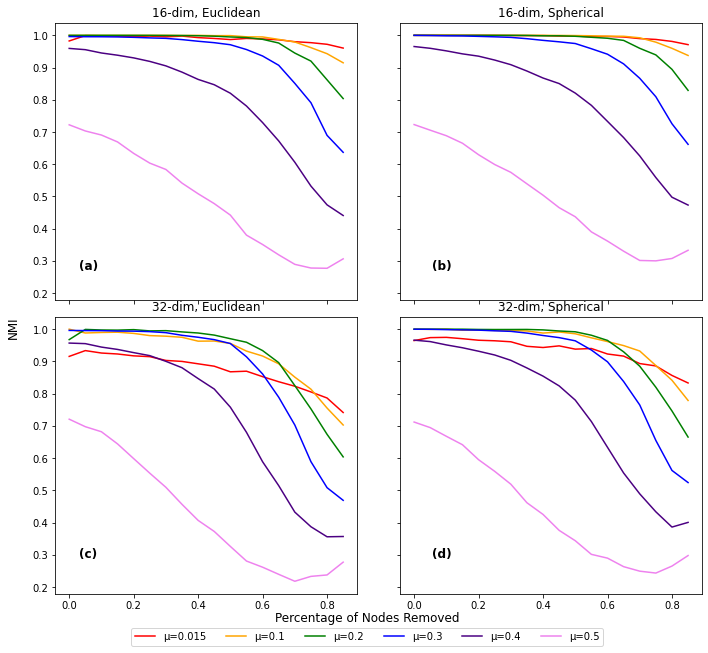

In [4]:
Plot_NMI(random_disturb=random_disturb, N=1000, method=3)